## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

So they want to understand the factors affecting the demand for shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [77]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Reading data

In [78]:
day=pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [79]:
day.shape

(730, 16)

## Missing values
There are no missing values present

In [80]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data cleaning

**Instant** is an id like attribute which is not required for analysis so we can remove it.

In [81]:
day.drop('instant',axis=1,inplace=True)

**dteday** This column has all the data in other columns so this is not required. There is only value of day of month not present in other columns. I tried taking the attribute ad building the model but the attribute showed high P-value did not add anything to the model. So we can drop dteday attribute

In [82]:
day.drop('dteday',axis=1,inplace=True)

**casual, registered** These two attributes denotes count of casual users, count of registered users which is not our point of analysis. We are mainly concerned about demand not individual demands so we can therese variables also else they are showing high correlation with cnt attribute

In [83]:
day.drop('casual',axis=1,inplace=True)

In [84]:
day.drop('registered',axis=1,inplace=True)

In [85]:
day.shape

(730, 12)

## EDA

### Univariate and Segemented Univariate Analysis

**Categorical Variables:** season, yr, mnth, holiday, weekday, workingday,
       weathersit

**Season** 1:spring, 2:summer, 3:fall, 4:winter

In [86]:
day.season.unique()

array([1, 2, 3, 4])

<AxesSubplot:xlabel='season'>

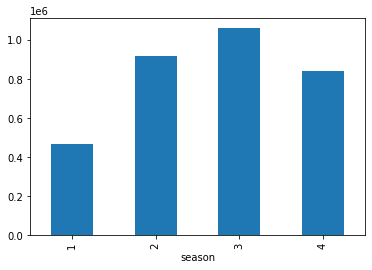

In [87]:
day.groupby('season').cnt.sum().plot.bar()

There is more sales in summer and fall where it is easy to ride bike

**weathersit** 
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [88]:
day.weathersit.unique()

array([2, 1, 3])

<AxesSubplot:xlabel='weathersit'>

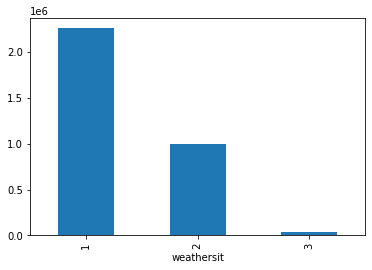

In [89]:
day.groupby('weathersit').cnt.sum().plot.bar()

When there are heavy rains or Ice pallets or snow there is no record of any retals taken and also there is relativley very few rentals when there is light snow or rain. There are high rentals when there is clear sky or few clouds

**year** 0: 2018, 1:2019

<AxesSubplot:xlabel='yr'>

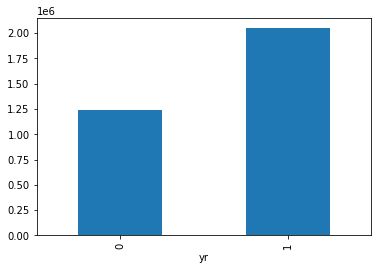

In [90]:
day.groupby('yr').cnt.sum().plot.bar()

The second year i.e 2019 have relatively high booking which says that business is growing

**month** 1 to 12

<AxesSubplot:xlabel='mnth'>

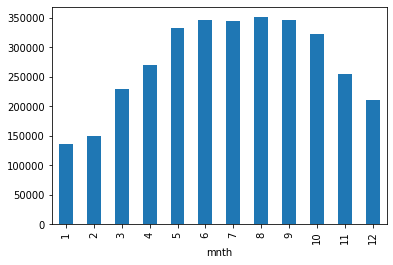

In [91]:
day.groupby('mnth').cnt.sum().plot.bar()

First and last months have low rentals relative to others.

**Holiday** weather day is a holiday or not

<AxesSubplot:xlabel='holiday'>

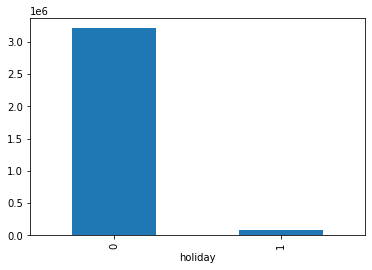

In [92]:
day.groupby('holiday').cnt.sum().plot.bar()

Non holidays have high rentals.

**Weekday** day of the week

<AxesSubplot:xlabel='weekday'>

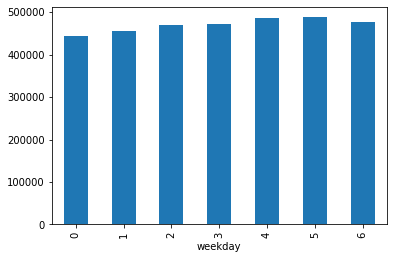

In [93]:
day.groupby('weekday').cnt.sum().plot.bar()

**Workingday** if day is neither weekend nor holiday is 1, otherwise is 0

<AxesSubplot:xlabel='workingday'>

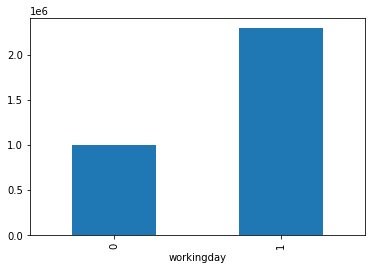

In [94]:
day.groupby('workingday').cnt.sum().plot.bar()

Working days have high bookings which says that the customers are mainly working people.

**Continous Variables:** temp, atemp, hum, windspeed, cnt

**temp** temperature in Celsius

<AxesSubplot:xlabel='temp'>

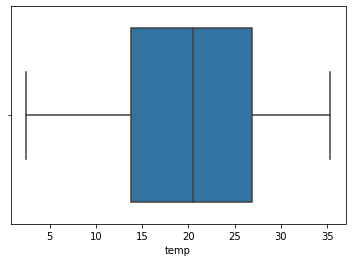

In [95]:
sns.boxplot(data=day,x='temp')

<AxesSubplot:xlabel='temp', ylabel='cnt'>

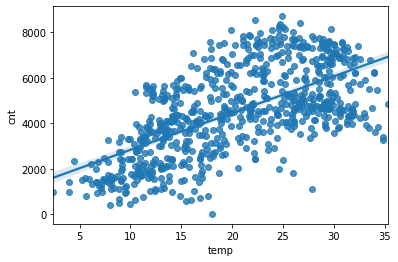

In [96]:
sns.regplot(x='temp',y='cnt',data=day)

**atemp:** feeling temperature in Celsius

<AxesSubplot:xlabel='atemp'>

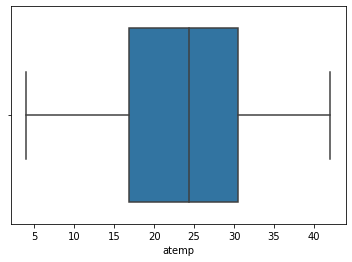

In [97]:
sns.boxplot(data=day,x='atemp')

<AxesSubplot:xlabel='atemp', ylabel='cnt'>

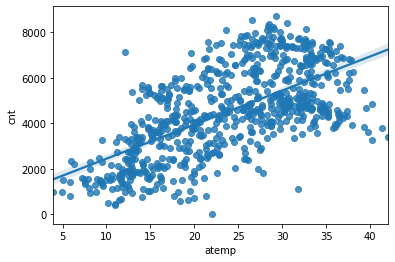

In [98]:
sns.regplot(x='atemp',y='cnt',data=day)

There is decent linear relationship with cnt attribute which is good for linear regression<br>
There are no outliers for temp and atemp attributes and both temp and atemp seems to be highly correlated. So we can drop one.

**Hum:** Humidity

In [99]:
day.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

In [100]:
#1.5*IQR
1.5*20

30.0

In [101]:
day[day['hum']<22]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
49,1,0,2,0,6,0,1,16.365847,19.5702,18.7917,34.000021,1635
68,1,0,3,0,4,1,3,15.952731,19.2834,0.0000,17.545759,623


<AxesSubplot:xlabel='hum'>

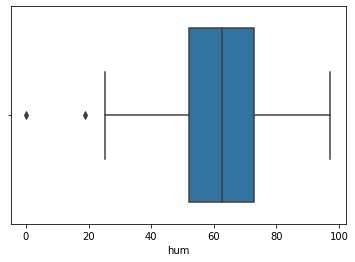

In [102]:
sns.boxplot(data=day,x='hum')

Very few outliers which can be neglected

<AxesSubplot:xlabel='hum', ylabel='cnt'>

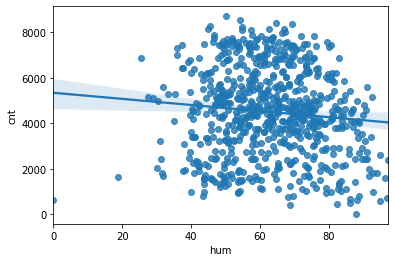

In [103]:
sns.regplot(x='hum',y='cnt',data=day)

Not good linear relationship with cnt attribute

**windspeed:** wind speed

In [104]:
day.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [105]:
15.625589 +(1.5*(15.625589-9.041650))


25.5014975

In [106]:
day[day['windspeed']>25.5014975]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
44,1,0,2,0,1,1,1,17.015000,19.91750,37.5833,27.999836,1913
49,1,0,2,0,6,0,1,16.365847,19.57020,18.7917,34.000021,1635
93,2,0,4,0,1,1,1,23.506653,27.14645,42.6250,25.833257,3115
94,2,0,4,0,2,1,2,16.980847,19.91750,64.2083,26.000489,1795
292,4,0,10,0,4,1,1,19.509153,23.32625,63.6250,28.292425,4195
382,1,1,1,0,3,1,1,12.436653,13.76270,44.3333,27.833743,3376
407,1,1,2,0,0,0,1,5.227500,5.08290,46.4583,27.417204,1529
420,1,1,2,0,6,0,1,11.924153,12.78375,39.5833,28.250014,2732
431,1,1,3,0,4,1,1,21.627500,26.23020,56.7500,29.584721,5382
432,1,1,3,0,5,1,2,16.844153,19.85415,40.7083,27.791600,4569


<AxesSubplot:xlabel='windspeed'>

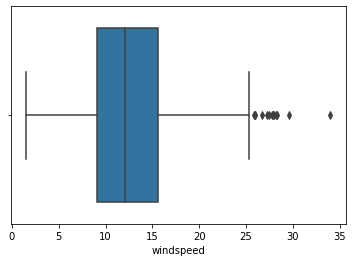

In [107]:
sns.boxplot(data=day,x='windspeed')

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

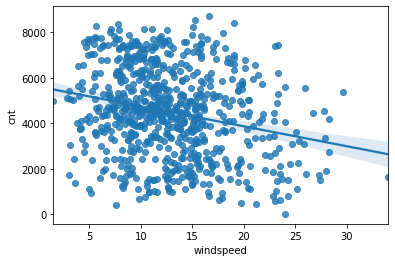

In [108]:
sns.regplot(x='windspeed',y='cnt',data=day)

Even though there are few otliers for wind they are not errors as there is fesibility for fast wind speed and all the values are greater than 0 with min at 1.500244. The wind seems to be negatively correlated with count even though correlation is not very huge

**cnt:** count of total rental bikes including both casual and registered

<AxesSubplot:xlabel='cnt'>

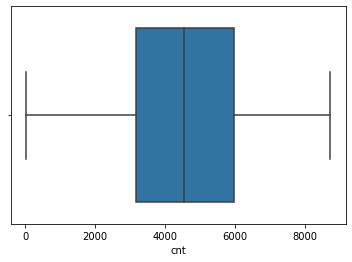

In [109]:
sns.boxplot(data=day,x='cnt')

No outliers for the count variable

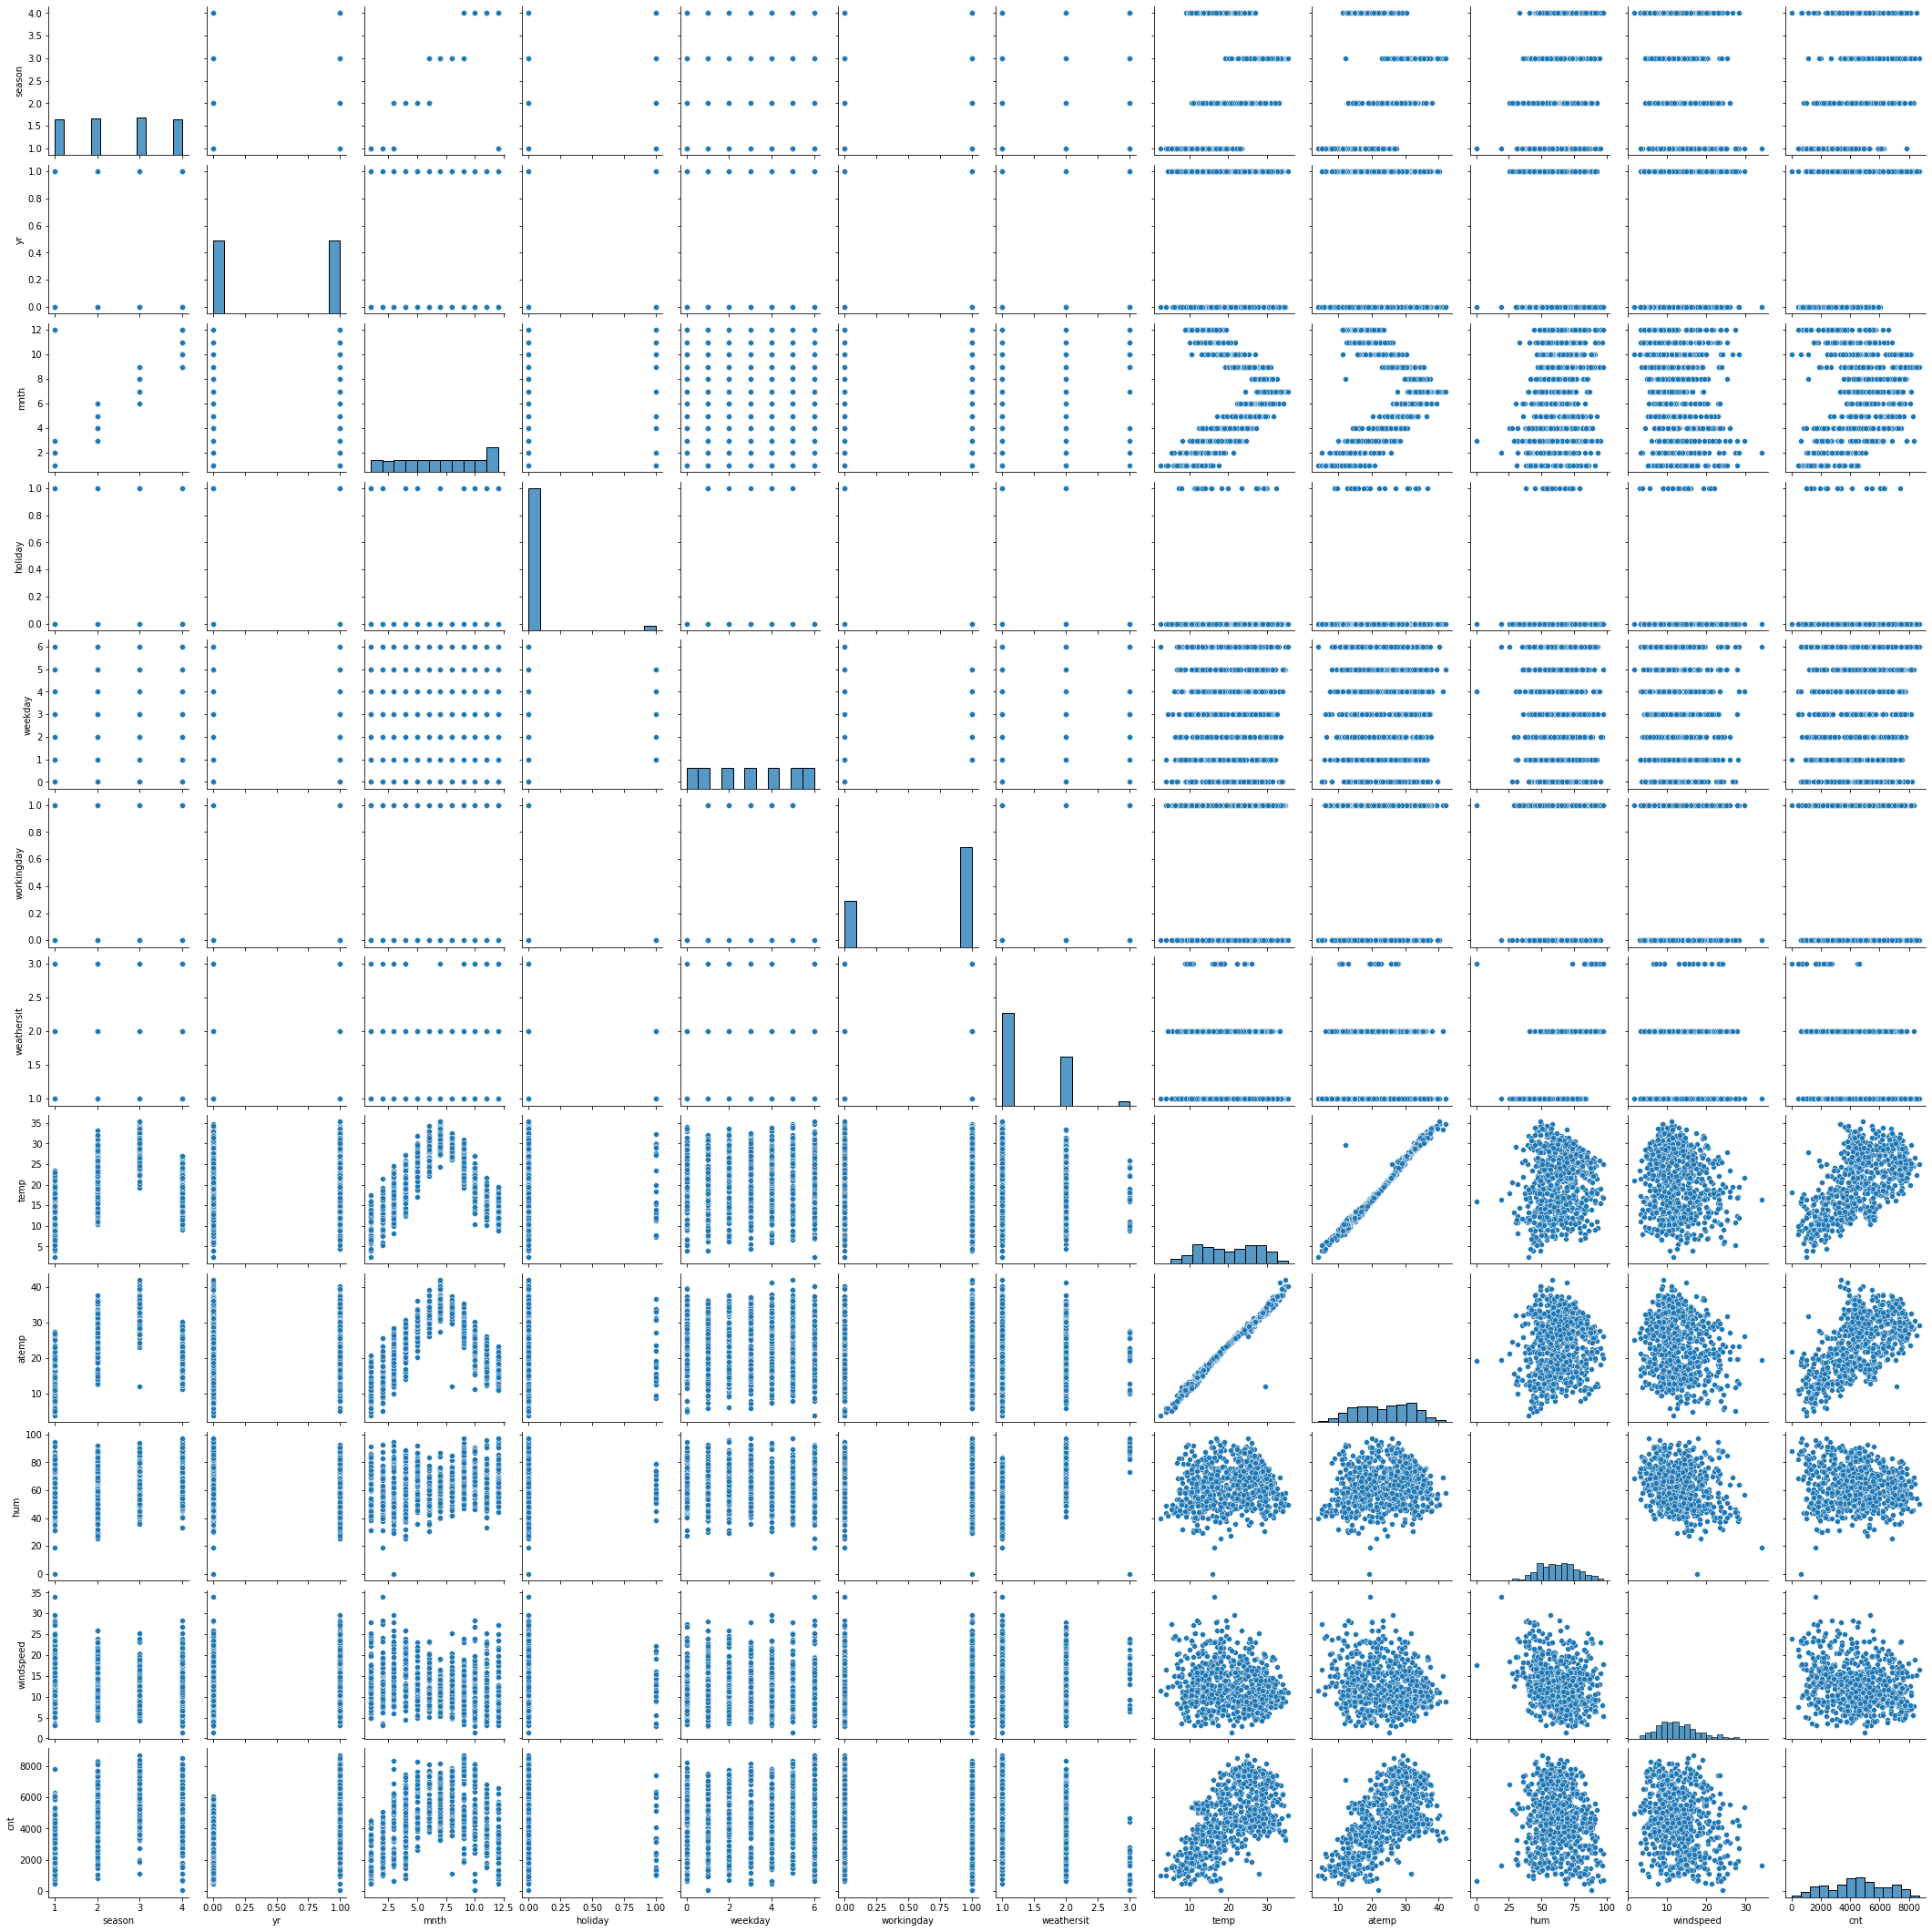

In [110]:
sns.pairplot(day)

cnt has good correlation with temp,atemp numerical variables

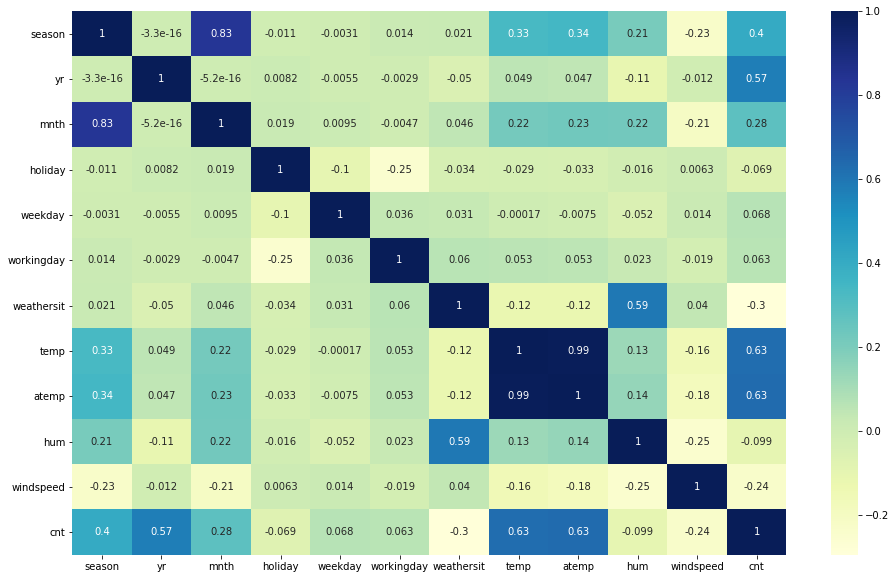

In [111]:
plt.figure(figsize = (16, 10))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

temp and atemp are very highly correlated 99% so we can drop one so lets drop temp.

In [112]:
day.drop('temp',axis=1,inplace=True)

## Dummy Variables

Even though the categorical variables are numerical they needs to be changed to dummy variables as the model assumes numbers as ordinal variables

Categorical variables with more than one value: season, mnth, weekday, weathersit

In [113]:
day['season'] = day['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [114]:
day['mnth'] = day['mnth'].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr",5:"May",6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [115]:
day['weekday']=day['weekday'].map({0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})

In [116]:
day['weathersit']=day['weathersit'].map({1: "Clear",2: "Mist",3: "Light Snow",4: "Heavy Rain"})

In [117]:
l=['season','mnth','weekday','weathersit']

In [118]:
for i in l:
    status=pd.get_dummies(day[i],drop_first=True)
    status
    day=pd.concat([day,status],axis=1)
    day.drop(i,inplace=True,axis=1)

In [119]:
day.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,1,0,0,0,0


## Train Test split

In [120]:
df_train,df_test=train_test_split(day,train_size=0.7,random_state=100)

In [121]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


## Scaling variables

In [122]:
day.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Light Snow', 'Mist'],
      dtype='object')

We can normalize atemp,hum,windspeed as they are continous variables and wanted them to be in the range of 0-1 as categorical variables for better interpretation of coefficients of model. cnt is not scaled as it is target variable

In [123]:
n_var=['atemp','hum','windspeed']
scaler=MinMaxScaler()
df_train[n_var]=scaler.fit_transform(df_train[n_var])

In [124]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
576,1,0,1,0.766351,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,4066,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,4220,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,1683,0,1,0,...,0,0,0,1,0,0,0,0,0,1


All the variables now have the range of 0-1 except cnt which is target variable

In [125]:
df_train.describe().loc['min',:]

yr             0.0
holiday        0.0
workingday     0.0
atemp          0.0
hum            0.0
windspeed      0.0
cnt           22.0
spring         0.0
summer         0.0
winter         0.0
Aug            0.0
Dec            0.0
Feb            0.0
Jan            0.0
Jul            0.0
Jun            0.0
Mar            0.0
May            0.0
Nov            0.0
Oct            0.0
Sep            0.0
Monday         0.0
Saturday       0.0
Sunday         0.0
Thursday       0.0
Tuesday        0.0
Wednesday      0.0
Light Snow     0.0
Mist           0.0
Name: min, dtype: float64

In [126]:
df_train.describe().loc['max',:]

yr               1.0
holiday          1.0
workingday       1.0
atemp            1.0
hum              1.0
windspeed        1.0
cnt           8714.0
spring           1.0
summer           1.0
winter           1.0
Aug              1.0
Dec              1.0
Feb              1.0
Jan              1.0
Jul              1.0
Jun              1.0
Mar              1.0
May              1.0
Nov              1.0
Oct              1.0
Sep              1.0
Monday           1.0
Saturday         1.0
Sunday           1.0
Thursday         1.0
Tuesday          1.0
Wednesday        1.0
Light Snow       1.0
Mist             1.0
Name: max, dtype: float64

In [127]:
y_train=df_train.pop('cnt')
X_train=df_train

In [128]:
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

In [129]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


## RFE

As there are 28 columns we can first use automated approach of filtering columns and select top 13 columns

In [130]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
rfe=RFE(lm,13)
rfe = rfe.fit(X_train, y_train)

In [132]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 6),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 4),
 ('Feb', False, 3),
 ('Jan', False, 2),
 ('Jul', False, 10),
 ('Jun', False, 9),
 ('Mar', False, 16),
 ('May', False, 7),
 ('Nov', False, 5),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 13),
 ('Sunday', True, 1),
 ('Thursday', False, 15),
 ('Tuesday', False, 11),
 ('Wednesday', False, 12),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [133]:
# Drop these columns
X_train.columns[~rfe.support_]

Index(['spring', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [134]:
#Keep the columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'summer',
       'winter', 'Aug', 'Sep', 'Sunday', 'Light Snow', 'Mist'],
      dtype='object')

In [135]:
#Filtering data set with required columns
X_train_rfe=X_train[col]

## OLS

In [136]:
#Adding constant to use stats model linear regression package OLS
X_train_rfe = sm.add_constant(X_train_rfe)

After a trail it is found that:<br>
All the variables have VIF<5 and only holiday have P value 0.049 very close to 0.05<br>
But keeping or removing the attribute is not contributing much to the accuracy or interpretation of model.<br>
So to make more perfect removed the column and bult the final model.

In [137]:
X_train_rfe.drop('holiday',inplace=True,axis=1)

In [138]:
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          7.65e-189
Time:                        21:31:43   Log-Likelihood:                -4119.8
No. Observations:                 510   AIC:                             8266.
Df Residuals:                     497   BIC:                             8321.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1559.3887    251.158      6.209      0.000    1065.927    2052.850
yr          1997.7905     70.954     28.156      0.000    1858.383    2137.198
workingday   446.5546     96.193      4.642      0.000     257.559     635.551
atemp       4901.7009    202.724     24.179      0.000    4503.400    5300.002
hum        -1474.3782    328.712     -4.485      0.000   -2120.214    -828.542
windspeed  -1435.0341    225.023     -6.377      0.000   -1877.148    -992.920
summer       880.5233     95.377      9.232      0.000     693.132    1067.915
winter      1228.1669     92.965     13.211      0.000    1045.515    1410.819
Aug          579.4674    140.916      4.112      0.000     302.604     856.331
Sep         1062.9751    141.150      7.531      0.000     785.651    1340.300
Sunday       520.0312    124.031      4.193      0.000     276.342     763.721
Light Snow -2030.0886    230.817     -8.795      0.000   -2483.586   -1576.591
Mist        -491.0169     92.058     -5.334      0.000    -671.888    -310.146
==============================================================================
Omnibus:                       60.873   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.151
Skew:                          -0.573   Prob(JB):                     4.15e-38
Kurtosis:                       5.605   Cond. No.                         20.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-square value is **84%** which is very good and also Adjusted R-square is also very good with **83.6%**. **P-value for all the columns are 0.0** which says all the columns coefficients are significant and the model is strong about it. 

In [139]:
#Analysing Multi collinearity
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.54
4,hum,1.87
2,workingday,1.65
10,Sunday,1.65
12,Mist,1.56
3,atemp,1.51
8,Aug,1.41
6,summer,1.38
7,winter,1.31
11,Light Snow,1.24


Only constant has high VIF which can be ignored

## Residual Analysis for train data set

In [140]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

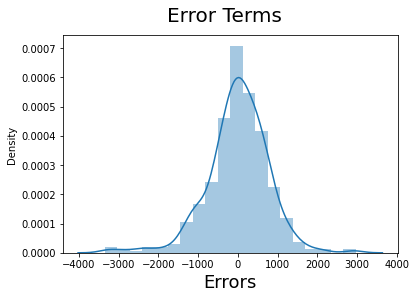

In [141]:
fig = plt.figure()
res=[y_train - y_train_pred]
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)   

**The mean is at zero which is inline with the assumptions of Linear regression.**

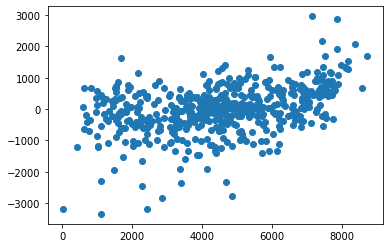

In [142]:
plt.scatter(y_train,res)

The residuals have almost constant variace except the once at the right end which is very few in number and thus less significant. There residuals also seem independent

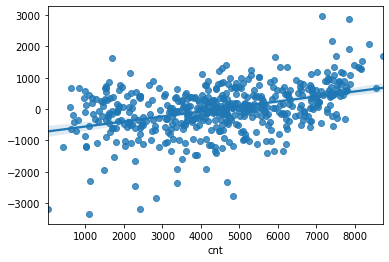

In [143]:
p=sns.regplot(x=y_train,y=res)

 There residuals also seem independent with very small slope

In [144]:
#Scaling test columns with the scaler fitted on train set
df_test[n_var]=scaler.transform(df_test[n_var])

In [145]:
#Splitting X and Y sets
y_test=df_test.pop('cnt')
X_test=df_test

In [146]:
#Adding constant to match train dataset
X_test_sm=sm.add_constant(X_test)

In [147]:
#Removing columns which are removed during model building
d=list(X_train.columns[~rfe.support_])
d.extend(['holiday'])
X_test_sm.drop(d,axis=1,inplace=True)

In [148]:
#predicting values for test set
y_test_pred=lm.predict(X_test_sm)

In [149]:
#calculating R-square value for the original Y value and predicted value for test data 
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8115122208678752

The R-square value of **81.15%** which is very high and comparable with train R-square value which is 84% which says that the model is generic.

Text(0, 0.5, 'y_pred')

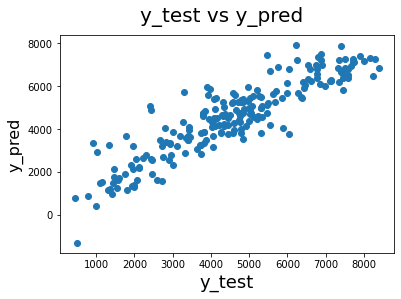

In [150]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

y_test and y_predicted on a scatter plot looks very good.

## Coefficients

In [151]:
lm.params.sort_values()

Light Snow   -2030.088580
hum          -1474.378159
windspeed    -1435.034138
Mist          -491.016933
workingday     446.554650
Sunday         520.031217
Aug            579.467384
summer         880.523289
Sep           1062.975139
winter        1228.166867
const         1559.388681
yr            1997.790535
atemp         4901.700909
dtype: float64

As we wanted to know what factors are driving for more bike rental we need to get the attributes with large coefficient values. The sign can be ignored to find highly influenced features and can be considered when analysing how it is influencing

In [152]:
lm.params.abs().sort_values(ascending=False)

atemp         4901.700909
Light Snow    2030.088580
yr            1997.790535
const         1559.388681
hum           1474.378159
windspeed     1435.034138
winter        1228.166867
Sep           1062.975139
summer         880.523289
Aug            579.467384
Sunday         520.031217
Mist           491.016933
workingday     446.554650
dtype: float64

Top 5 most influencing attributes neglecting constant are: <br>
- atemp
- Light Snow 
- year
- Humidity
- Wind speed<br>

Year can also be neglected as it cannot be a factor but prediction it was a factor as there was great relationship between cnt and year.

From the coefficient of constant we can interpret that when all these factors fail still we may have 1559 rentals.

- atemp     : (positive coefficient) high temperature leads to more rentals
- Light Snow: (negative coefficient) light snow weather leads to less rentals.
- year      : second year had more rentals so the coefficient is positive
- Humidity  : (negative coefficient) More humidity leads to less rentals.
- Wind speed: (negative coefficient) More windspeed leads to less rentals.<br>

Similarly we can interpret other attributes also

- winter: (positive coefficient) Winter season attracted more rentals
- Sep: (positive coefficient) September month has more rentals
- summer: (positive coefficient) Summer season attracted more rentals
- Aug: (positive coefficient) August month has more rentals
- Sunday: (positive coefficient) Sundays have good number of rentals
- Mist: (negative coefficient) Misty weather may show small effect on rentals
- workingday: (positive coefficient) Working days have good number of rentals